In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8) # set the figure size for pyplot 
import random
from scipy.stats import norm 

We'll conduct a one-tailed hypothesis test.

* Null Hypothesis: the average height for 6 year old males is 116.32 cm.
* Alternative Hypothesis: the average height for 6 year old males is greater than 116.32 cm

We'll set alpha (our siginificance level) to be 0.05

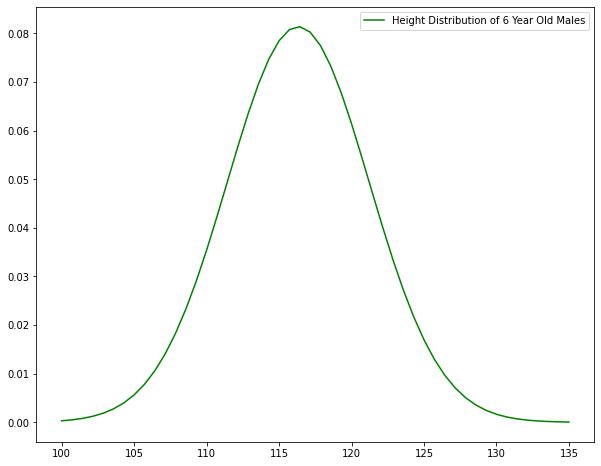

In [15]:
# plotting the height distribution of 6 year old males in Japan

simulated_heights = np.linspace(100, 135, 50) # heights in centimeters
mean = 116.32 # in cm
std = 4.90 # in cm
pdf_norm = norm.pdf(simulated_heights, mean, std)

plt.plot(simulated_heights, pdf_norm, label="Height Distribution of 6 Year Old Males", color="green")
plt.legend(loc="upper right");

In [3]:
# create data for class 4 -- the class that has Bill in it

# sampling 20 random male students from a class 
class_4_heights = [round(random.uniform(105, 120), 2) for i in range(19)]

# I'm adding Bill's height at the end of the list
class_4_heights.append(136.0) 

# print a list of heights from a sample class of 1st graders
print(class_4_heights)

[118.11, 118.97, 110.14, 110.12, 111.09, 118.9, 118.87, 108.59, 105.41, 112.54, 113.81, 112.15, 113.9, 108.21, 106.6, 111.25, 119.26, 117.73, 107.83, 136.0]


Our p-value is 0.684 which is > 0.05


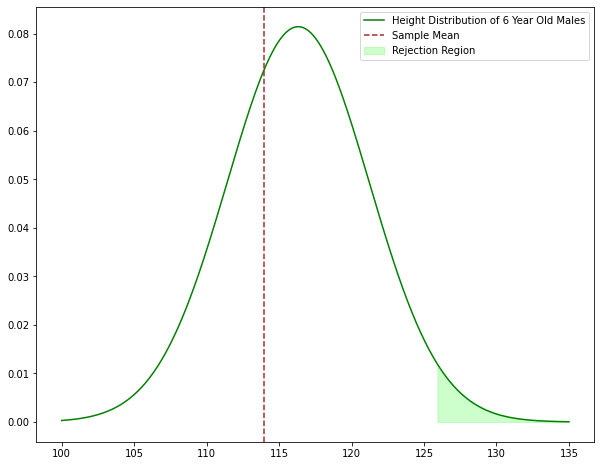

In [4]:
sample_mean = np.mean(class_4_heights)

plt.plot(simulated_heights, pdf_norm, label="Height Distribution of 6 Year Old Males", color="green")
plt.axvline(sample_mean, ls="--", label="Sample Mean", color="brown")
limit = norm.ppf(0.975, mean, std)
plt.fill_between(simulated_heights, pdf_norm, 0, alpha=0.2, where=(simulated_heights > limit), label="Rejection Region", color="lime")
plt.legend(loc="upper right");

print(f"Our p-value is {norm.sf(sample_mean, mean, std):.3f} which is > 0.05")

Let's say that I ***deliberately*** sampled a collection of 6 year old males that were between the heghts of 125cm to 136 cm. 

How would my conculusion change?

In [5]:
# create data for tall 1 st graders 

# I'm assuming there are 20 male students in this sample class, and everyone is around Bill's height
tall_class_4_heights = [round(random.uniform(125, 136), 2) for i in range(19)]

# I'm adding Bill's height at the end of the list
tall_class_4_heights.append(136.0) 

# print a list of heights from a class of very tall first graders 😅
print(tall_class_4_heights)

[132.16, 125.14, 126.24, 133.47, 134.12, 132.06, 135.64, 131.32, 132.45, 125.25, 132.91, 128.37, 128.72, 130.21, 132.16, 132.51, 126.84, 135.79, 126.69, 136.0]


Our p-value is 0.001 which is <= 0.05


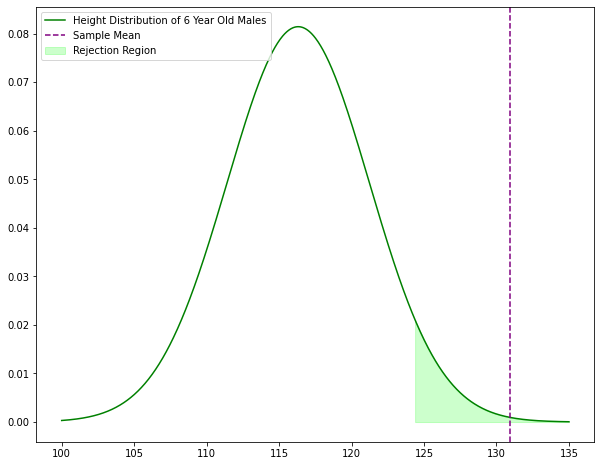

In [6]:
tall_sample_mean = np.mean(tall_class_4_heights)

plt.plot(simulated_heights, pdf_norm, label="Height Distribution of 6 Year Old Males", color="green")
plt.axvline(tall_sample_mean, ls="--", label="Sample Mean", color="purple")
limit = norm.ppf(0.95, mean, std)
plt.fill_between(simulated_heights, pdf_norm, 0, alpha=0.2, where=(simulated_heights > limit), label="Rejection Region", color="lime")
plt.legend(loc="upper left");

print(f"Our p-value is {norm.sf(tall_sample_mean, mean, std):.3f} which is <= 0.05")